<a href="https://colab.research.google.com/github/joshiakshada0404/ML_Algorithms/blob/main/K_Mean_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clusturing

In [132]:
import pandas as pd
import numpy as np

In [133]:
players = pd.read_csv("players_22.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [134]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [135]:
features = ["overall","potential","wage_eur","value_eur","age"]

In [136]:
players = players.dropna(subset = features)

In [137]:
data = players[features].copy()

In [138]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1.  Scale the data - every row should have equal importance
2.  Initialise random centroids
3.  Label each data point 
4.  Update centroids
5.  Repeate 3/4 until centroid stops changing.


In [139]:
#Scaling on 1 to 10
data = ((data - data.min()) / (data.max() - data.min()) ) * 9 + 1

In [140]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [141]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [142]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
# sample will randomly select any value from a particular row
# apply method will look to each col

#apply method will look at each col and then sample method will choose random value from that row and will be converted to float 

In [143]:
centroids = random_centroids(data, 5)

In [144]:
centroids

,0,1,2,3,4
overall,8.043478,2.956522,4.717391,6.478261,4.130435
potential,5.695652,5.108696,5.500000,5.304348,5.891304
wage_eur,1.527897,1.656652,1.218884,1.010300,1.010300
value_eur,1.013501,1.015820,1.078452,1.087731,1.044817
age,2.333333,3.333333,4.000000,8.333333,5.333333


In [145]:
#step3
#Root Mean Square Value
# centroids.iloc[:,0]

def get_labels(data, centroids):
  # finding minimum distance
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  # assigning cluster to each data point
  return distances.idxmin(axis=1)

In [146]:
labels = get_labels(data, centroids)

In [147]:
labels.value_counts()

2    8582
1    5167
4    3119
3    1304
0     993
dtype: int64

In [148]:
#Step4 : Update centroid
data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean()))


,overall,potential,wage_eur,value_eur,age
0,7.147132,7.661330,2.168220,2.023197,3.564709
1,2.967177,4.648144,1.023258,1.019814,2.502108
2,5.013128,5.540339,1.172957,1.098101,3.704089
3,5.889908,5.491373,1.357305,1.147478,7.082103
4,4.823442,4.437623,1.118397,1.047350,5.893461


In [149]:
data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T


#grouping up the data by its label and then finding geometric mean of data in that particular label
# transposeing it so that it will be same look as centroids table

,0,1,2,3,4
overall,7.147132,2.967177,5.013128,5.889908,4.823442
potential,7.661330,4.648144,5.540339,5.491373,4.437623
wage_eur,2.168220,1.023258,1.172957,1.357305,1.118397
value_eur,2.023197,1.019814,1.098101,1.147478,1.047350
age,3.564709,2.502108,3.704089,7.082103,5.893461


In [150]:
def new_centroids(data, labels, k):
  centroids = data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
  return centroids

In [151]:
from sklearn.decomposition import PCA      # visualise our data 
import matplotlib.pyplot as plt            # do the ploting
from IPython.display import clear_output   # clear the output each time 


#Principal component analysis (PCA). 
#Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
# here we have 5col(overall, potential,wage,value,age) this will be compreased to 2D 

In [152]:
#BONUS : Ploting every step to see the changes : Visualisation

def plot_clusters(data, labels, centroids , iteration):
  #setting the value of PCA : dimention
  pca = PCA(n_components=2)
  # actually running the pca on our data
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T) 
  clear_output(wait = True)
  plt.title(f'Iteration {iteration} ')
  plt.scatter(x = data_2d[:,0] , y = data_2d[:,1], c = labels)
  plt.scatter(x = centroids_2d[:,0], y= centroids_2d[:,1] )
  plt.show()


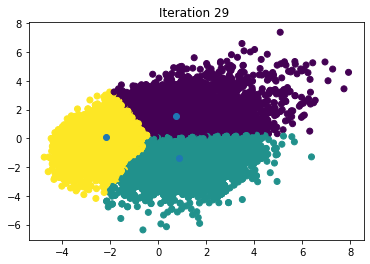

In [153]:
#Combining all the steps

max_iterations = 100
k = 3
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids) :
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids,iteration)
  iteration +=1


# the number of iteraions for each run will cange because centroids are assigned randomly

In [154]:
centroids

,0,1,2
overall,5.806043,4.784633,3.206838
potential,6.497993,4.506962,4.928473
wage_eur,1.420001,1.118904,1.028505
value_eur,1.285501,1.044980,1.026614
age,3.596161,5.472247,2.518708


Summary :

1.  On a scale of 10 cluster-0 has the highest overall rating - Star Players
2.  Cluster-1 has younger players - there overall rating is below avg but have significant potential
3.  Cluster-2 has oldest players and have the least rating and potential

In [155]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [156]:
#Cluster 1 has younger players - there overall rating is low but have high potential
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


Comparing Implementation with the scikit-learn

In [163]:
from sklearn.cluster import KMeans

In [164]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [165]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.209924,4.799796,3.585518
potential,6.607269,4.501974,5.198831
wage_eur,1.646822,1.112748,1.039268
value_eur,1.407396,1.039892,1.035288
age,4.127377,5.613459,2.707162


In [ ]:
centroids

,0,1,2
overall,5.806043,4.784633,3.206838
potential,6.497993,4.506962,4.928473
wage_eur,1.420001,1.118904,1.028505
value_eur,1.285501,1.044980,1.026614
age,3.596161,5.472247,2.518708
